# Data Analysis

## Primeras aproximaciones de análisis

In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date

pd.set_option('display.max_columns', None)

# Cargamos el dataframe final de extracción, donde están todas las canciones, con duplicados (los hemos dejado
# por si utilizamos en algún momento la columna position)
data_ana = pd.read_csv("data_global.csv", sep = ',')
print(data_ana.shape)

# Quitamos las columnas que no usaremos casi seguro
data_ana= data_ana.drop(columns=['Unnamed: 0', 'Position', 'Streams'])
print(data_ana.shape)

# Quitamos los duplicados por canciones, no nos sirven de momento para el primer análisis.
data_ana = data_ana.drop_duplicates(subset='spotify_id').copy()
print(data_ana.shape)

#Revisamos los tipos de datos:
print(data_ana.info())

(16323, 36)
(16323, 33)
(586, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 16322
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Track Name         586 non-null    object 
 1   Artist             586 non-null    object 
 2   date               586 non-null    object 
 3   spotify_id         586 non-null    object 
 4   year               586 non-null    int64  
 5   Streamstotal       586 non-null    int64  
 6   album              586 non-null    object 
 7   release_date       586 non-null    object 
 8   length             586 non-null    float64
 9   popularity         586 non-null    float64
 10  acousticness       586 non-null    float64
 11  danceability       586 non-null    float64
 12  energy             586 non-null    float64
 13  instrumentalness   586 non-null    float64
 14  liveness           586 non-null    float64
 15  loudness           586 non-null    flo

## PREVIO: Hacer ponderación para calcular medias respecto a los streams totales

- Añadir una columna con el peso respecto a Streams total, y respecto a su año
- Luego habría que multiplicar el valor de cada feature por el peso y sumar los resultados.

In [20]:
data_ana.head(3)

,Track Name,Artist,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity
0,Tusa,KAROL G,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,0.292869,0.919192,0.295,0.803,0.715,0.000134,0.0574,0.935251,0.397800,0.574,0.264121,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
61,Follow,KAROL G,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,7027186,Follow,2020-04-01,0.298599,0.787879,0.667,0.735,0.787,0.000006,0.0721,0.898363,0.198031,0.455,0.760289,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
103,Créeme,KAROL G,2019-03-14,1mT47pKLXUwPYGwB91GcNz,2019,3197262,Créeme,2018-11-02,0.323850,0.727273,0.154,0.715,0.872,0.000146,0.1100,0.927806,0.045599,0.682,0.233830,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87


In [21]:
# Ojo, puede ocurrir que una misma canción de un artista se repita, porque está en el top200 dos años diferentes y albunes diferentes
data_ana[data_ana['Artist'] == 'KAROL G']

,Track Name,Artist,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity
0,Tusa,KAROL G,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,0.292869,0.919192,0.29500,0.803,0.715,0.000134,0.0574,0.935251,0.397800,0.574,0.264121,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
61,Follow,KAROL G,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,7027186,Follow,2020-04-01,0.298599,0.787879,0.66700,0.735,0.787,0.000006,0.0721,0.898363,0.198031,0.455,0.760289,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
103,Créeme,KAROL G,2019-03-14,1mT47pKLXUwPYGwB91GcNz,2019,3197262,Créeme,2018-11-02,0.323850,0.727273,0.15400,0.715,0.872,0.000146,0.1100,0.927806,0.045599,0.682,0.233830,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
153,Culpables,KAROL G,2019-03-14,6q8Lb50EtqNeeJXXe8mMAH,2019,2080234,Culpables,2018-09-14,0.361815,0.696970,0.27900,0.728,0.801,0.000005,0.1430,0.946638,0.065287,0.416,0.475806,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
203,Punto G,KAROL G,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.240826,0.616162,0.00796,0.787,0.751,0.000139,0.0857,0.886134,0.091633,0.926,0.738108,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
231,Créeme,KAROL G,2019-05-03,4EKZsrsCKyqr64FBHLc0DU,2019,661661,OCEAN,2019-05-03,0.328685,0.666667,0.12600,0.715,0.874,0.000162,0.1050,0.925280,0.045744,0.652,0.234239,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
242,Love With A Quality,KAROL G,2019-05-03,6F9DPkjP6Tbz9FLgLyYgX6,2019,46140,OCEAN,2019-05-03,0.354116,0.616162,0.06460,0.849,0.752,0.000003,0.1060,0.919216,0.177765,0.586,0.263631,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
243,Culpables,KAROL G,2019-05-03,4RGKft6YTTWHjpQeRIInuS,2019,396519,OCEAN,2019-05-03,0.368085,0.606061,0.28700,0.728,0.812,0.000003,0.1300,0.944111,0.087001,0.418,0.475587,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
254,La Dama,KAROL G,2018-03-14,18Lf9mbzkZnQDjksUhpIqY,2018,694782,Unstoppable,2017-10-27,0.312855,0.000000,0.12200,0.842,0.771,0.000167,0.0967,0.847460,0.248697,0.750,0.256113,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87


In [22]:
# Vemos que en el 2018 hay muchos menos Streams totales, eso puede significar que se usaba menos Spotify, o 
# que el top200 no se escuchaba tanto.
data_ana.groupby(['year']).sum()

,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity
year,,,,,,,,,,,,,,,
2018,261300058,65.586123,83.575758,48.341340,146.719,142.8754,0.934578,34.0682,180.738816,23.559496,115.3234,86.759025,844,1885968761,16411
2019,418018158,59.149850,103.262626,44.837241,128.201,120.6641,1.933619,28.7440,152.955801,26.357412,103.3340,78.760245,717,1744724141,14437
2020,465349661,61.061102,141.424242,48.863260,140.010,129.8510,1.813487,31.5911,167.852513,26.910683,114.8705,83.353269,770,1348145276,15375


In [23]:
data_ana.groupby(['year']).count()

,Track Name,Artist,date,spotify_id,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,193,158,105,65,31,12,4,1,1,212,212,212
2019,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,160,125,81,55,30,16,3,0,0,180,180,180
2020,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,190,154,109,45,23,9,3,2,0,0,194,194,194


In [102]:
# Vamos a añadir los pesos de cada canción en una nueva columna
# Versión optimizada corta y sin warnings

data_ana_2020 = data_ana.loc[data_ana['year'] == 2020]
data_ana_2019 = data_ana.loc[data_ana['year'] == 2019]
data_ana_2018 = data_ana.loc[data_ana['year'] == 2018]

data_ana.loc[data_ana.year == 2020, 'streamstotal_weights'] = data_ana_2020['Streamstotal']/data_ana_2020['Streamstotal'].sum()
data_ana.loc[data_ana.year == 2019, 'streamstotal_weights'] = data_ana_2019['Streamstotal']/data_ana_2019['Streamstotal'].sum()
data_ana.loc[data_ana.year == 2018, 'streamstotal_weights'] = data_ana_2018['Streamstotal']/data_ana_2018['Streamstotal'].sum()



In [100]:
data_ana.head()

,Track Name,Artist,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity
0,Tusa,KAROL G,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,0.292869,0.919192,0.29500,0.803,0.715,0.000134,0.0574,0.935251,0.397800,0.574,0.264121,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
61,Follow,KAROL G,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,7027186,Follow,2020-04-01,0.298599,0.787879,0.66700,0.735,0.787,0.000006,0.0721,0.898363,0.198031,0.455,0.760289,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
103,Créeme,KAROL G,2019-03-14,1mT47pKLXUwPYGwB91GcNz,2019,3197262,Créeme,2018-11-02,0.323850,0.727273,0.15400,0.715,0.872,0.000146,0.1100,0.927806,0.045599,0.682,0.233830,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
153,Culpables,KAROL G,2019-03-14,6q8Lb50EtqNeeJXXe8mMAH,2019,2080234,Culpables,2018-09-14,0.361815,0.696970,0.27900,0.728,0.801,0.000005,0.1430,0.946638,0.065287,0.416,0.475806,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87
203,Punto G,KAROL G,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.240826,0.616162,0.00796,0.787,0.751,0.000139,0.0857,0.886134,0.091633,0.926,0.738108,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87


In [93]:
'''# Forma rudimentaria de hacerlo, probar a hacerlo con un apply y lambda https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

data_ana_2020 = data_ana.loc[data_ana['year'] == 2020]
data_ana_2019 = data_ana.loc[data_ana['year'] == 2019]
data_ana_2018 = data_ana.loc[data_ana['year'] == 2018]

total_streams_2020 = data_ana_2020['Streamstotal'].sum()
print(total_streams_2018)
total_streams_2019 = data_ana_2019['Streamstotal'].sum()
print(total_streams_2019)
total_streams_2018 = data_ana_2018['Streamstotal'].sum()
print(total_streams_2020)

data_ana_2020['streamstotal_weights'] = data_ana_2020['Streamstotal']/total_streams_2020
data_ana_2019['streamstotal_weights'] = data_ana_2019['Streamstotal']/total_streams_2019

data_ana_2020_only = data_ana_2020[['year','spotify_id', 'streamstotal_weights']].copy()
data_ana_2019_only = data_ana_2019[['year','spotify_id', 'streamstotal_weights']].copy()
data_ana_sum = pd.concat([data_ana_2020_only, data_ana_2019_only], axis=0)

data_anam = pd.merge(data_ana, data_ana_sum, on=['year','spotify_id'])
data_anam.head()'''

261300058
418018158
465349661


<ipython-input-93-0f50ba8e6409>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ana_2020['streamstotal_weights'] = data_ana_2020['Streamstotal']/total_streams_2020
<ipython-input-93-0f50ba8e6409>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ana_2019['streamstotal_weights'] = data_ana_2019['Streamstotal']/total_streams_2019


,Track Name,Artist,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity,streamstotal_weights_x,streamstotal_weights_y
0,Tusa,KAROL G,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,0.292869,0.919192,0.29500,0.803,0.715,0.000134,0.0574,0.935251,0.397800,0.574,0.264121,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.040505,0.040505
1,Follow,KAROL G,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,7027186,Follow,2020-04-01,0.298599,0.787879,0.66700,0.735,0.787,0.000006,0.0721,0.898363,0.198031,0.455,0.760289,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.015101,0.015101
2,Créeme,KAROL G,2019-03-14,1mT47pKLXUwPYGwB91GcNz,2019,3197262,Créeme,2018-11-02,0.323850,0.727273,0.15400,0.715,0.872,0.000146,0.1100,0.927806,0.045599,0.682,0.233830,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.007649,0.007649
3,Culpables,KAROL G,2019-03-14,6q8Lb50EtqNeeJXXe8mMAH,2019,2080234,Culpables,2018-09-14,0.361815,0.696970,0.27900,0.728,0.801,0.000005,0.1430,0.946638,0.065287,0.416,0.475806,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.004976,0.004976
4,Punto G,KAROL G,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.240826,0.616162,0.00796,0.787,0.751,0.000139,0.0857,0.886134,0.091633,0.926,0.738108,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.004617,0.004617


In [106]:
# Comprobaciones
print(data_ana.shape)

# Deberían sumar 1 los pesos de cada año
print(data_ana.loc[data_ana['year'] == 2020, 'streamstotal_weights'].sum())
print(data_ana.loc[data_ana['year'] == 2019, 'streamstotal_weights'].sum())
print(data_ana.loc[data_ana['year'] == 2018, 'streamstotal_weights'].sum())

#Ver cómo sale
data_ana[data_ana['Track Name'] == 'Punto G']

(586, 34)
1.0
1.0
1.0


,Track Name,Artist,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity,streamstotal_weights
203,Punto G,KAROL G,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.240826,0.616162,0.00796,0.787,0.751,0.000139,0.0857,0.886134,0.091633,0.926,0.738108,4,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,87,0.004617


# Análisis

In [108]:
# Vemos que el número de canciones únicas en cada año registradas
data_ana.groupby(['year']).count()

,Track Name,Artist,date,spotify_id,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,193,158,105,65,31,12,4,1,1,212,212,212,212
2019,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,160,125,81,55,30,16,3,0,0,180,180,180,180
2020,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,190,154,109,45,23,9,3,2,0,0,194,194,194,194


## ¿Ha cambiado la cantidad de música que se escucha en spotify?

- A partir de streams totales de cada año

In [217]:
data_ana.groupby(['year']).sum()

,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,
2018,261300058,65.586123,83.575758,48.341340,146.719,142.8754,0.934578,34.0682,180.738816,23.559496,115.3234,86.759025,844,1885968761,16411,1.0
2019,418018158,59.149850,103.262626,44.837241,128.201,120.6641,1.933619,28.7440,152.955801,26.357412,103.3340,78.760245,717,1744724141,14437,1.0
2020,465349661,61.061102,141.424242,48.863260,140.010,129.8510,1.813487,31.5911,167.852513,26.910683,114.8705,83.353269,770,1348145276,15375,1.0


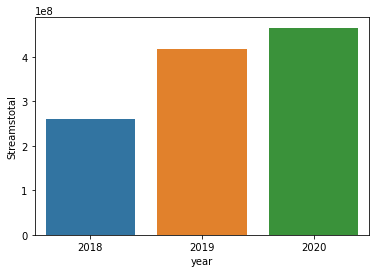

In [216]:
data_ana_streams = data_ana.loc[:, ['year', 'Streamstotal']]
data_year_streams = data_ana_streams.groupby(['year']).sum()
data_year_streams.reset_index(inplace=True)
data_year_streams

sns.barplot(x="year", y="Streamstotal", data=data_year_streams)

#### **Análisis**: Vemos que los streams total de cada año varian, siendo las del 2020 casi el doble. Cuidado porque puede ocurrir que spotify lo escuchaba menos gente, que la gente escichaba más variedad (hay que acordarse que los datos son del top200, toda la música que no esté en el top200 se queda fuera

## ¿Han cambiado las features?

In [219]:
# Vemos una aproximación de las medias sin ponderar de las features, a ver si tienen sentido, parece que si, y todas están entre 0 y 1
data_ana.groupby(['year']).mean()


,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,
2018,1.232547e+06,0.309369,0.394225,0.228025,0.692071,0.673941,0.004408,0.160699,0.852542,0.111130,0.543978,0.409241,3.981132,8.896079e+06,77.410377,0.004717
2019,2.322323e+06,0.328610,0.573681,0.249096,0.712228,0.670356,0.010742,0.159689,0.849754,0.146430,0.574078,0.437557,3.983333,9.692912e+06,80.205556,0.005556
2020,2.398710e+06,0.314748,0.728991,0.251872,0.721701,0.669335,0.009348,0.162841,0.865219,0.138715,0.592116,0.429656,3.969072,6.949202e+06,79.252577,0.005155


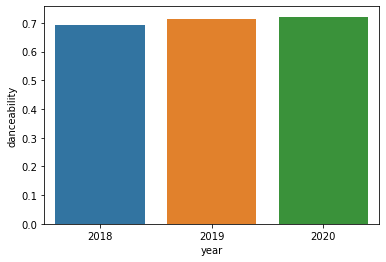

In [123]:
# Ploteamos la media de una feature concreta (sin ponderar)
data_year_means= data_ana.groupby(['year']).mean()
data_year_means.reset_index(inplace=True)
data_year_means

sns.barplot(x="year", y="danceability", data=data_year_means)

In [170]:
# Función para calcular las medias ponderadas de cada feature por años, para poner en gráficos fácilmente.
def mediapon_features (feature):
    data_dance_compar = data_ana.loc[:, ['year', feature, 'streamstotal_weights']]
    data_dance_compar["mean_pon_" + feature] = data_dance_compar[feature] * data_dance_compar['streamstotal_weights']
    media_dance_compar = data_dance_compar.groupby(['year']).sum()
    media_dance_compar.reset_index(inplace=True)
    media_dance_compar = media_dance_compar.drop(columns=[feature])
    return media_dance_compar

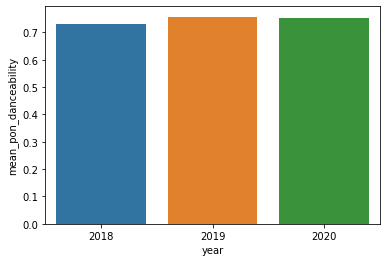

In [172]:
media_dance_pon = mediapon_features ('danceability')
sns.barplot(x="year", y="mean_pon_danceability", data=media_dance_pon)

In [167]:
media_dance_pon

,year,streamstotal_weights,weight_danceability
0,2018,1.0,0.728966
1,2019,1.0,0.757125
2,2020,1.0,0.750999


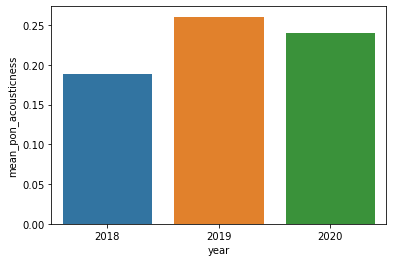

In [173]:
media_acous_pon = mediapon_features ('acousticness')
sns.barplot(x="year", y="mean_pon_acousticness", data=media_acous_pon)

In [175]:
media_dance_pon

,year,streamstotal_weights,mean_pon_danceability
0,2018,1.0,0.728966
1,2019,1.0,0.757125
2,2020,1.0,0.750999


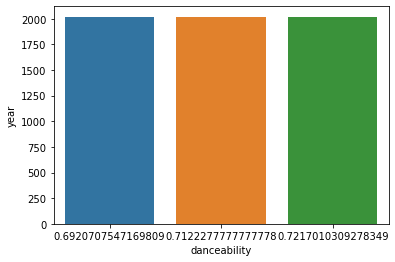

In [198]:
# Comparar medias sin y con ponderación
comparar_pon_ysinpon = pd.merge(data_year_means, media_dance_pon, how='right', on="year")
comparar_pon_ysinpon = comparar_pon_ysinpon[['year', 'danceability', 'mean_pon_danceability']]

sns.barplot(x="danceability", y = 'year', data=comparar_pon_ysinpon)

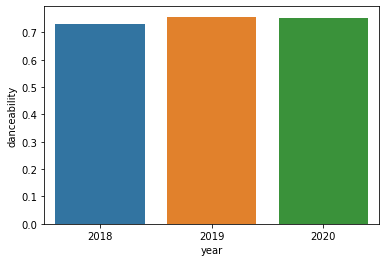

In [194]:
sns.barplot(x="year", y="mean_pon_danceability", data=media_dance_pon)
sns.barplot(x="year", y="danceability", data=data_year_means)

In [157]:
# Gráfico para comparar dos variables por años, VER PRÓXIMO
# sns.barplot(x="weight_acousticness", y="weight_acousticness", hue="year", data=data_year_means)

ValueError: Could not interpret input 'weight_acousticness'

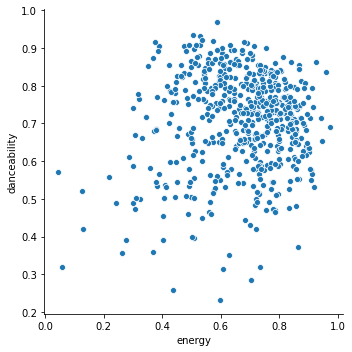

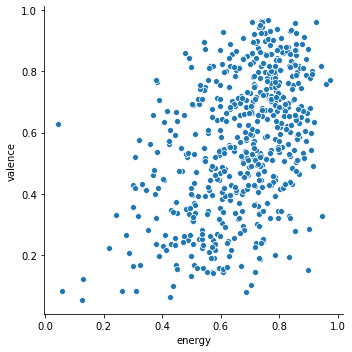

In [129]:
# Correlaciones
sns.relplot(x="energy", y="danceability", data=data_ana)
sns.relplot(x="energy", y="valence", data=data_ana)